In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


# Veri setinin Okunması ve Düzenlenmesi

In [4]:
df =  pd.read_csv("USArrests.csv").copy()
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


- Veri setindeki eyalet isimlerini index olarak belirliyeceğiz ve yukarısındaki başlığı kaldıracağız 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
df.index = df.iloc[:,0]
df = df.iloc[: , 1:]
df.head(3)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [8]:
del df.index.name
df.head(3)
#  index ismini başarı ile kaldırdık 


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


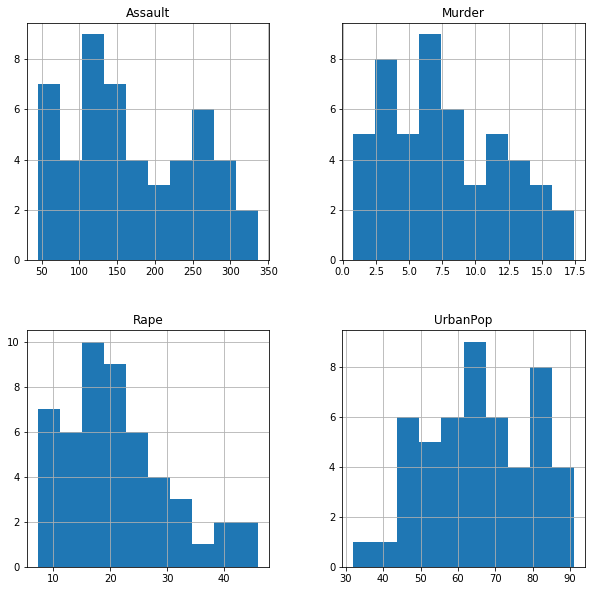

In [9]:
df.hist(figsize = (10 ,10));
# dağılımlar normal dağılımların oluşum sebepleri incelenmelidir

# Model kurma 

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters = 3)
# n_clusters = küme sayısı 

In [12]:
kmeans_model = kmeans.fit(df)

### Küme sayısı

In [13]:
kmeans_model.n_clusters

3

### Değerlerin merkezi Uzaklıkları

In [14]:
kmeans_model.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ]])

### Değerlerin kümelenmiş halleri 

In [15]:
kmeans_model.labels_

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0])

### Değerleri veri setine ekleme 

In [16]:
df["Küme_no"] = kmeans_model.labels_

In [17]:
df.head(3)

,Murder,Assault,UrbanPop,Rape,Küme_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1


In [18]:
df.groupby("Küme_no").mean()

,Murder,Assault,UrbanPop,Rape
Küme_no,,,,
0,8.214286,173.285714,70.642857,22.842857
1,11.812500,272.562500,68.312500,28.375000
2,4.270000,87.550000,59.750000,14.390000


# Görselleştirme 

In [19]:
kumeler = kmeans_model.labels_
merkezler = kmeans_model.cluster_centers_

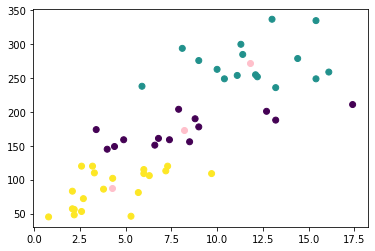

In [20]:
plt.scatter( df.iloc[: , 0] ,df.iloc[: ,1] ,c = kumeler  );
plt.scatter( merkezler[: , 0] , merkezler[: ,1 ] , c= "pink");

# 3D Görselleştirme 

In [21]:
from mpl_toolkits.mplot3d import Axes3D

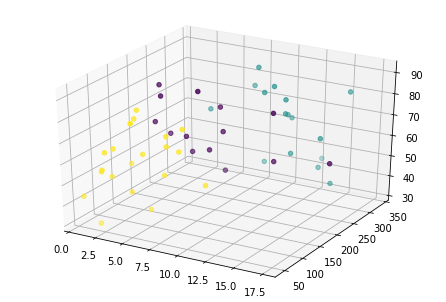

In [23]:
fig = plt.figure()
ax  = Axes3D(fig)
ax.scatter( df.iloc[: , 0] ,df.iloc[: , 1] ,df.iloc[: ,2] ,c= kumeler );

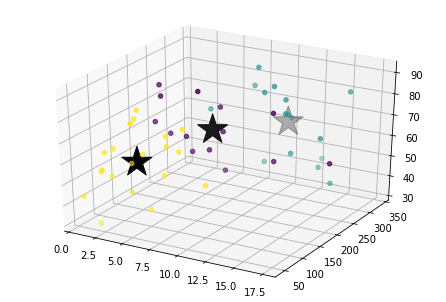

In [24]:
fig = plt.figure()
ax  = Axes3D(fig)
ax.scatter( df.iloc[: , 0] ,df.iloc[: , 1] ,df.iloc[: ,2] ,c= kumeler ) 
ax.scatter( merkezler[: ,0] ,merkezler[: ,1] ,merkezler[: ,2],
          marker = "*",
          c = '#050505',
          s = 1000);

# Optimum küme sayısı belirleme 

In [25]:
!pip install yellowbrick

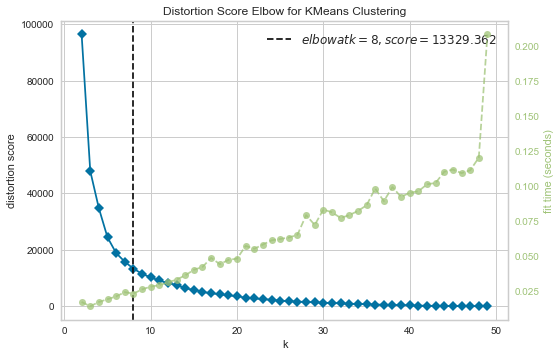

In [26]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer( kmeans ,k=(2,50) )
visualizer.fit(df)
visualizer.poof()